## 1. 데이터 전처리

In [48]:
from keras.datasets import mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
import sys

In [24]:
from keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [25]:
# MNIST 데이터는 총 7만개 이미지 중 6만개는 학습용, 1만개는 테스트용으로 미리 구분해 놓음
print('학습셋 이미지 수: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d 개' % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


In [7]:
print(X_train.shape)
print(X_test.shape)
# X_train[0]

(60000, 28, 28)
(10000, 28, 28)


In [26]:
print('X_train dimension size: %d * %d * %d' % (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

X_train dimension size: 60000 * 28 * 28


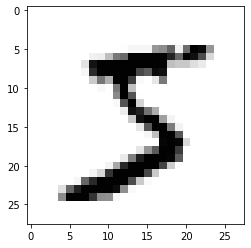

In [27]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [28]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [29]:
# 은닉층은 1차원의 구조이기 때문에
X_train = X_train.reshape(X_train.shape[0], 784)

In [32]:
X_train = X_train.astype('float64')

# 데이터 정규화: 데이터 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정
X_train = X_train / 255

In [33]:
# print('X_train dimension size: %d * %d * %d' % (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [34]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [35]:
print('class: %d ' % (Y_class_train[0]))

class: 5 


In [36]:
from keras.utils import np_utils

# 원-핫 인코딩
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [37]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## MNIST 손글씨 인식하기: 데이터 전처리

In [38]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


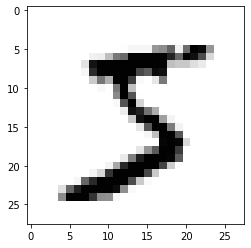

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [39]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수: %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수: %d 개' % (X_test.shape[0]))

# 그래프로 확인
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')
    
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')

X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스값 확인
print('class: %d ' % (Y_class_train[0]))

# 바이너리화 과정
# 원-핫 인코딩
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

## 2. 딥러닝 기본 프레임 만들기

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [50]:
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                              verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [51]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200,
                   verbose = 0, callbacks = [checkpointer, early_stopping_callback])
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15341, saving model to ./model/01-0.1534.hdf5

Epoch 00002: val_loss improved from 0.15341 to 0.10402, saving model to ./model/02-0.1040.hdf5

Epoch 00003: val_loss improved from 0.10402 to 0.09058, saving model to ./model/03-0.0906.hdf5

Epoch 00004: val_loss improved from 0.09058 to 0.07821, saving model to ./model/04-0.0782.hdf5

Epoch 00005: val_loss improved from 0.07821 to 0.07307, saving model to ./model/05-0.0731.hdf5

Epoch 00006: val_loss improved from 0.07307 to 0.06307, saving model to ./model/06-0.0631.hdf5

Epoch 00007: val_loss improved from 0.06307 to 0.06068, saving model to ./model/07-0.0607.hdf5

Epoch 00008: val_loss did not improve from 0.06068

Epoch 00009: val_loss did not improve from 0.06068

Epoch 00010: val_loss did not improve from 0.06068

Epoch 00011: val_loss did not improve from 0.06068

Epoch 00012: val_loss did not improve from 0.06068

Epoch 00013: val_loss did not improve from 0.06068

Epoch 00014: val_lo

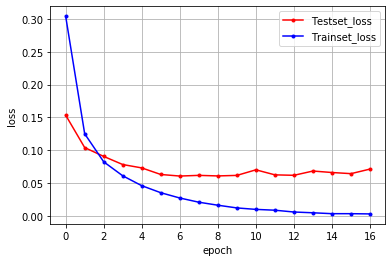

In [52]:
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## MNIST 손글씨 인식하기: 기본 프레임

In [53]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import os


Epoch 00001: val_loss improved from inf to 0.15423, saving model to ./model/01-0.1542.hdf5

Epoch 00002: val_loss improved from 0.15423 to 0.10417, saving model to ./model/02-0.1042.hdf5

Epoch 00003: val_loss improved from 0.10417 to 0.08474, saving model to ./model/03-0.0847.hdf5

Epoch 00004: val_loss improved from 0.08474 to 0.07791, saving model to ./model/04-0.0779.hdf5

Epoch 00005: val_loss improved from 0.07791 to 0.06887, saving model to ./model/05-0.0689.hdf5

Epoch 00006: val_loss improved from 0.06887 to 0.06081, saving model to ./model/06-0.0608.hdf5

Epoch 00007: val_loss did not improve from 0.06081

Epoch 00008: val_loss improved from 0.06081 to 0.05973, saving model to ./model/08-0.0597.hdf5

Epoch 00009: val_loss improved from 0.05973 to 0.05745, saving model to ./model/09-0.0575.hdf5

Epoch 00010: val_loss did not improve from 0.05745

Epoch 00011: val_loss did not improve from 0.05745

Epoch 00012: val_loss did not improve from 0.05745

Epoch 00013: val_loss did n

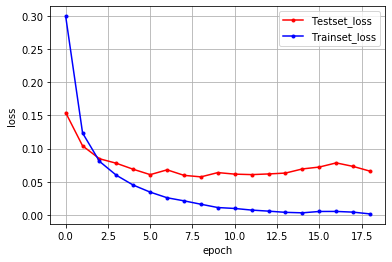

In [54]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
    
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 바이너리화 과정
# 원-핫 인코딩
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행 환경
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                              verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

# 모델 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200,
                   verbose = 0, callbacks = [checkpointer, early_stopping_callback])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. 더 깊은 딥러닝

## 4. 컨볼루션 신경망(CNN)

## 5. 맥스 풀링

## 6. 컨볼루션 신경망 실행하기

## MNIST 손글시 인식하기: 컨볼루션 신경망 적용

In [56]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


Epoch 00001: val_loss improved from inf to 0.05540, saving model to ./model/01-0.0554.hdf5

Epoch 00002: val_loss improved from 0.05540 to 0.03921, saving model to ./model/02-0.0392.hdf5

Epoch 00003: val_loss improved from 0.03921 to 0.03277, saving model to ./model/03-0.0328.hdf5

Epoch 00004: val_loss did not improve from 0.03277

Epoch 00005: val_loss did not improve from 0.03277

Epoch 00006: val_loss improved from 0.03277 to 0.02772, saving model to ./model/06-0.0277.hdf5

Epoch 00007: val_loss did not improve from 0.02772

Epoch 00008: val_loss did not improve from 0.02772

Epoch 00009: val_loss did not improve from 0.02772

Epoch 00010: val_loss did not improve from 0.02772

Epoch 00011: val_loss improved from 0.02772 to 0.02759, saving model to ./model/11-0.0276.hdf5

Epoch 00012: val_loss improved from 0.02759 to 0.02450, saving model to ./model/12-0.0245.hdf5

Epoch 00013: val_loss did not improve from 0.02450

Epoch 00014: val_loss did not improve from 0.02450

Epoch 00015

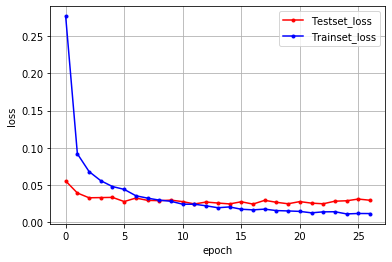

In [58]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 바이너리화 과정
# 원-핫 인코딩
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 회적화 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                              verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

# 모델 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200,
                   verbose = 0, callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()